In [1]:
import requests
import pandas as pd
import numpy as np
import urllib.request
import csv
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpld3
from sklearn.cluster import KMeans
from sklearn import datasets
from bs4 import BeautifulSoup
from docx import Document
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.palettes import Category10
import plotly.express as px

In [2]:
# Copying data from NCDC Website proved difficult because it appears the website
# is no longer functional. So to overcome that, I copied the document version
# from the data saved on the website and converted that into the dataframe dff.

doc = Document("C:\\Users\\ogbo9\\Documents\\Source Code\\NCDC Covid19 Data.docx")

# Extract the data from tables
data = []
header = None
for table in doc.tables:
    for i, row in enumerate(table.rows):
        if i == 0:  # First row is the header
            header = [cell.text for cell in row.cells]
        else:
            row_data = [cell.text for cell in row.cells]
            data.append(row_data)

# Create a dataframe with the extracted data and header
dff = pd.DataFrame(data, columns=header)

In [3]:
# Importing data from John Hopkins. I have used j moniker to differentiate.
urlj = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
response = requests.get(urlj)
soup = BeautifulSoup(response.text, 'html.parser')

dfj = pd.read_csv(urlj)

In [4]:
urlj1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
dfj1 = pd.read_csv(urlj1)

In [5]:
urlj2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
dfj2 =pd.read_csv(urlj2)

In [6]:
# To differentiate data from Ustacky GitHub repository, I used the moniker U.

urlu = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv"
dfu = pd.read_csv(urlu)

In [7]:
urlu1 = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv"
dfu1 = pd.read_csv(urlu1)

In [8]:
urlu2 = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv"
dfu2 = pd.read_csv(urlu2)

In [9]:
urlu3 = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv"
dfu3 = pd.read_csv(urlu3)

In [10]:
# Then I used the standard .head() and .info() functions to check the data copied.

dfj.head(2)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  

[2 rows x 1147 columns]

In [11]:
dfu1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [12]:
# To Clean the data from the NCDC website to remove comma.

columns = ['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']

for col in columns:
    dff[col] = dff[col].astype(str) 
    
columns = ['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']

for col in columns:
    dff[col] = dff[col].str.replace(',', '')
    dff[col] = pd.to_numeric(dff[col])

In [13]:
# To rename the columns in dff for easy entry.

dff.rename(columns={'No. of Cases (Lab Confirmed)': 'Cases', 
                    'No. of Cases (on admission)': 'Hospitalized', 
                    'No. Discharged': 'Discharged', 
                    'No. of Deaths': 'Deaths'}, inplace=True)


In [14]:
# To call the column names to ensure the change is done.
column_names = dff.columns.tolist()

# Print the column names
print(column_names)

['States Affected', 'Cases', 'Hospitalized', 'Discharged', 'Deaths']


In [15]:
# To extract data for Nigeria in the John Hopkins
# Repository, I first joined the extracted dfs in a new df, dfju.

dfju = pd.concat([dfj, dfj1, dfj2])

In [16]:
# Then from dfju I extract all data on Nigeria and named it dfjn.

dfjn = dfju[dfju['Country/Region'] == 'Nigeria']

In [17]:
# Create and replace with desired row names.

new_row_names = ['Infections', 'Discharged', 'Deaths']  

# Update the row names
dfjn.index = new_row_names

# Print the updated dataframe
# print(dfjn)

In [18]:
# To call the new row names
row_names = dfjn.index.tolist()

# Print the row names
print(row_names)

['Infections', 'Discharged', 'Deaths']


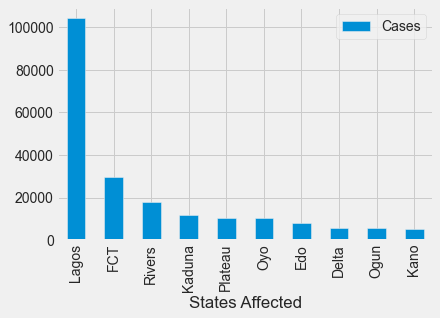

In [19]:
# Using DataFrame from NCDC website I named 'dff' I want to plot the top ten rows based on the values in the column 'Cases'
top_ten = dff.nlargest(10, 'Cases')

# Create a bar plot
top_ten.plot(kind='bar', x='States Affected', y='Cases')

# Show the plot
plt.show()

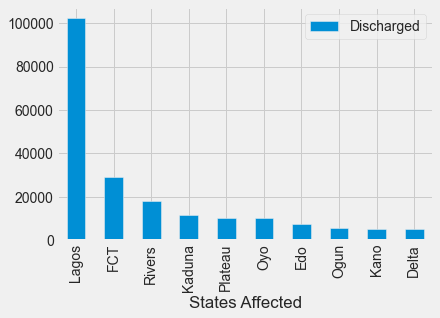

In [20]:
# Using DataFrame from NCDC website I named 'dff' I want to plot the top ten rows based on the values in the column 'Discharged'
top_ten = dff.nlargest(10, 'Discharged')

# Create a bar plot
top_ten.plot(kind='bar', x='States Affected', y='Discharged')

# Show the plot
plt.show()

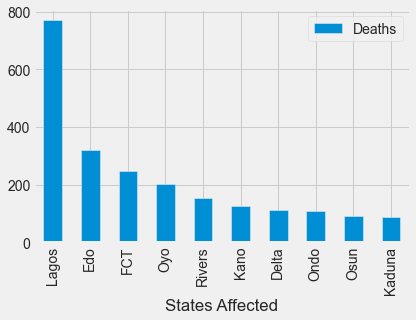

In [21]:
# Using DataFrame from NCDC website I named 'dff' I want to plot the top ten rows based on the values in the column 'Deaths'
top_ten = dff.nlargest(10, 'Deaths')

# Create a bar plot
top_ten.plot(kind='bar', x='States Affected', y='Deaths')

# Show the plot
plt.show()

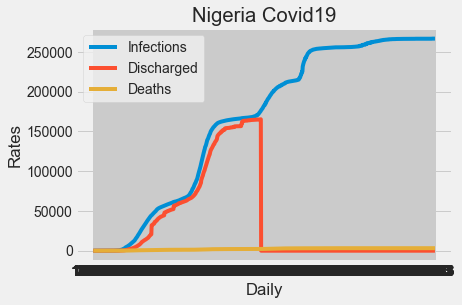

In [22]:
# Select the rows I want to plot the Nigeria John Hopkins extract
rows_to_plot = ['Infections', 'Discharged', 'Deaths']  

# Remove the first four columns because they are not numeric
dfjn = dfjn.iloc[:, 4:]

# To plot the selected rows
for row in rows_to_plot:
    plt.plot(dfjn.columns, dfjn.loc[row])

# Customize the chart
plt.legend(rows_to_plot)  
plt.xlabel('Daily')  
plt.ylabel('Rates')  
plt.title('Nigeria Covid19')  


plt.show()

# Realised that the death plot flatlined when I used the above.

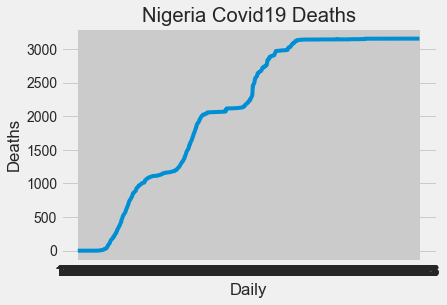

In [23]:
# So I ploted it separately to be sure.

plt.plot(dfjn.columns, dfjn.loc['Deaths'])
plt.xlabel('Daily')  
plt.ylabel('Deaths')  
plt.title('Nigeria Covid19 Deaths')  
plt.show()

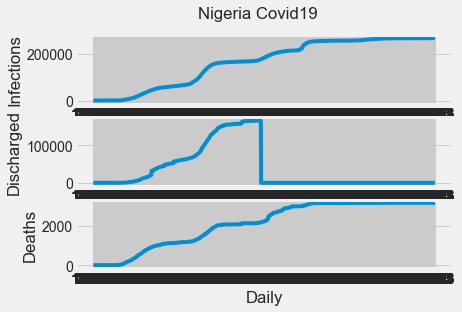

In [24]:
# And used sub-plots to get a better plot view.

fig, axs = plt.subplots(3)
fig.suptitle('Nigeria Covid19')
axs[0].plot(dfjn.columns, dfjn.loc['Infections'])
axs[0].set(ylabel='Infections')
axs[1].plot(dfjn.columns, dfjn.loc['Discharged'])
axs[1].set(ylabel='Discharged')
axs[2].plot(dfjn.columns, dfjn.loc['Deaths'])
axs[2].set(xlabel='Daily', ylabel='Deaths')
plt.show()

In [25]:
# Plotting line chart for each row
fig = px.line(dfjn, x=dfjn.columns, y=dfjn.index, title='Nigeria Covid19')

# Adding interactivity
fig.update_layout(
    xaxis_title='Rates',
    yaxis_title='Daily',
    hovermode='closest'
)

# Display the plot
fig.show()

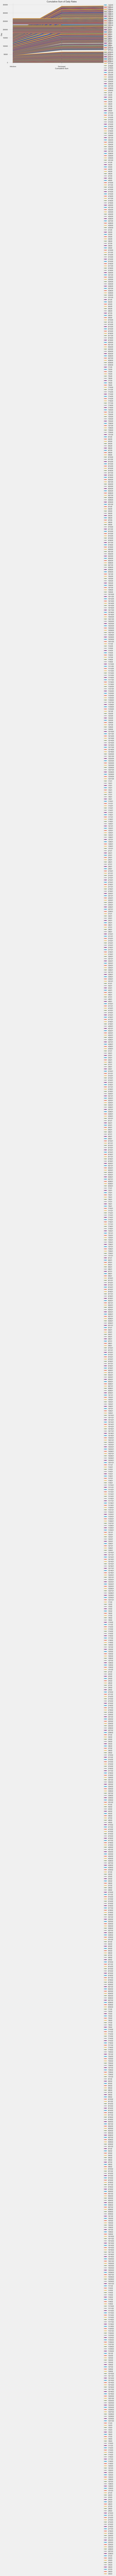

In [26]:
# Transpose the DataFrame
dfjna = dfjn.transpose()

# Calculate the cumulative sum for each title
dfjna_cumulative = dfjna.cumsum(axis=1)

# Create the plot
plt.figure(figsize=(16, 10))

for title in dfjna_cumulative.index:
    plt.plot(dfjna_cumulative.columns, dfjna_cumulative.loc[title], marker='o', label=title)

plt.title('Cumulative Sum of Daily Rates')
plt.ylabel('Day')
plt.xlabel('Cumulative Sum')

plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Reshape DataFrame from wide to long format to calculate the diff.
dfjn_melted = dfjn.melt(var_name='Date', value_name='Infections')
dfjn_melted['Date'] = pd.to_datetime(dfjn_melted['Date'])
dfjn_melted.set_index('Date', inplace=True)


# Calculate the daily rate
daily_rate = dfjn_melted['Infections'].diff()

# Display results
print('Daily rate:')
print(daily_rate)

Daily rate:
Date
2020-01-22         NaN
2020-01-22         0.0
2020-01-22         0.0
2020-01-23         0.0
2020-01-23         0.0
                ...   
2023-03-08   -266598.0
2023-03-08      3155.0
2023-03-09    263443.0
2023-03-09   -266598.0
2023-03-09      3155.0
Name: Infections, Length: 3429, dtype: float64


In [28]:
# Select the row containing the infection counts
Infections = dfjn.loc['Infections']

# Calculate the daily rate
daily_rate = Infections.diff()

# Calculate the derivative of the daily rate
derivative = daily_rate.diff()

# Display results
print('Daily rate:')
print(daily_rate)
print('Derivative of daily rate:')
print(derivative)

Daily rate:
1/22/20    NaN
1/23/20    0.0
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: Infections, Length: 1143, dtype: float64
Derivative of daily rate:
1/22/20    NaN
1/23/20    NaN
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: Infections, Length: 1143, dtype: float64


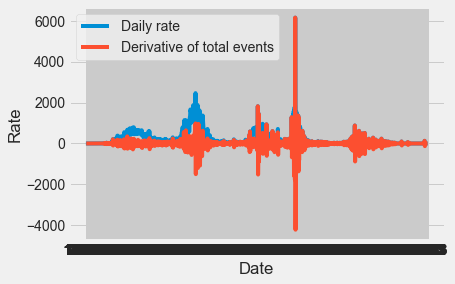

In [29]:
# Calculate the derivative of total events
#cumulative_events = dfjn['Infections'].cumsum()
#derivative = cumulative_events.diff() / cumulative_events.index.to_series().diff().dt.days

Infections = dfjn.loc['Infections']

# Plot daily rate
plt.plot(daily_rate, label='Daily rate')

# Plot derivative of total events
plt.plot(derivative, label='Derivative of total events')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()

# Show plot
plt.show()

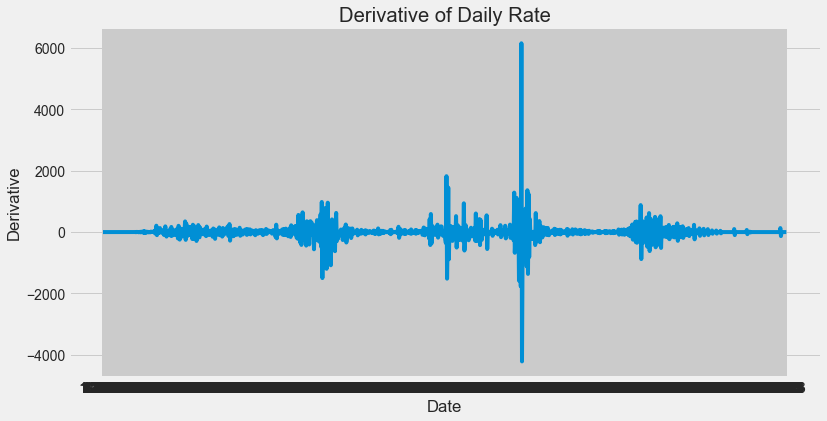

Daily rate:
1/22/20    NaN
1/23/20    0.0
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: Infections, Length: 1143, dtype: float64
Derivative of daily rate:
1/22/20    NaN
1/23/20    NaN
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: Infections, Length: 1143, dtype: float64


In [30]:
# Select the row containing the infection counts
Infections = dfjn.loc['Infections']

# Calculate the daily rate
daily_rate = Infections.diff()

# Calculate the derivative of the daily rate
derivative = daily_rate.diff()

# Plot the derivative of the daily rate
plt.figure(figsize=(12,6))
plt.plot(derivative)
plt.title('Derivative of Daily Rate')
plt.xlabel('Date')
plt.ylabel('Derivative')
plt.show()

# Display results
print('Daily rate:')
print(daily_rate)
print('Derivative of daily rate:')
print(derivative)


In [31]:
# Select the row containing the infection counts to isolate max rate and date.
Infections = dfjn.loc['Infections']

# Calculate the daily rate
daily_rate = Infections.diff()

# Find the maximum infection rate
max_rate = daily_rate.max()

# Find the date when the maximum infection rate occurred
max_date = daily_rate.idxmax()

# Display results
print('Maximum infection rate:', max_rate)
print('Date of maximum infection rate:', max_date)

Maximum infection rate: 6158.0
Date of maximum infection rate: 12/22/21


In [32]:
# Creating a new df by merging the DataFrames dfu and dff on the column states
dfjc = pd.merge(dfu, dff, left_on='states', right_on = 'States Affected')

# Display the merged DataFrame
# print(dfjc)

In [33]:
# To select the top ten cases in the df by descending order and creating a new df.
dfjc1 = dfjc.sort_values('Cases', ascending=False)

# Select the top ten rows and create a new df for plotting.
dfjc1 = dfjc.nlargest(10, 'Cases')


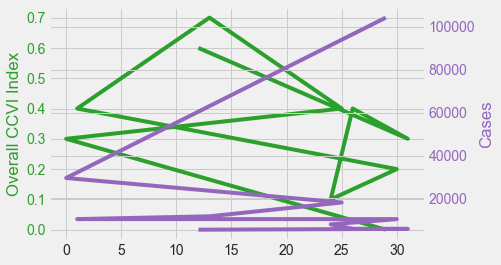

In [34]:
# Generate line plots to compare two columns.
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
ax1.plot(dfjc1.index, dfjc1['Overall CCVI Index'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(dfjc1.index, dfjc1['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


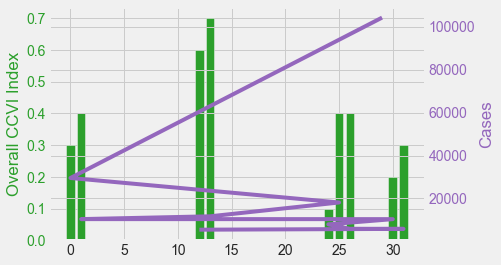

In [35]:
# Using bar and line plot on the new dfjc1 dataframe
x = dfjc1.index
y1 = dfjc1['Overall CCVI Index']
y2 = dfjc1['Cases']

fig, ax1 = plt.subplots()

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
ax1.bar(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()

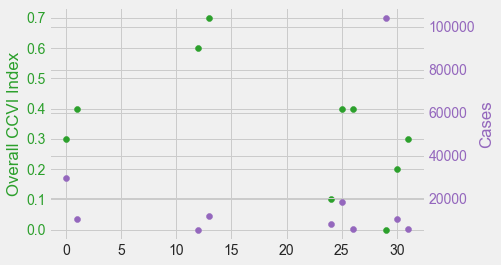

In [36]:
# Using a scatter plot to plot dfjc1 DataFrame
x = dfjc1.index
y1 = dfjc1['Overall CCVI Index']
y2 = dfjc1['Cases']

fig, ax1 = plt.subplots()

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
ax1.scatter(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.scatter(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


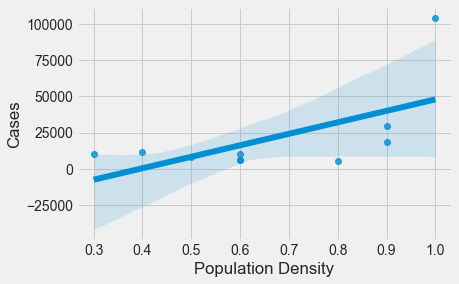

In [37]:
# Using a regression plot.
sns.regplot(x ='Population Density', y ='Cases', data=dfjc1)

plt.show()

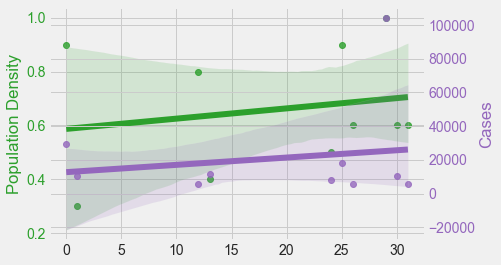

In [38]:
# To make a regression plot to plot two columns on dfjc1
x = dfjc1.index
y1 = dfjc1['Population Density']
y2 = dfjc1['Cases']

fig, ax1 = plt.subplots()

# Plot 'Population Density' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Population Density', color=color)
sns.regplot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
sns.regplot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


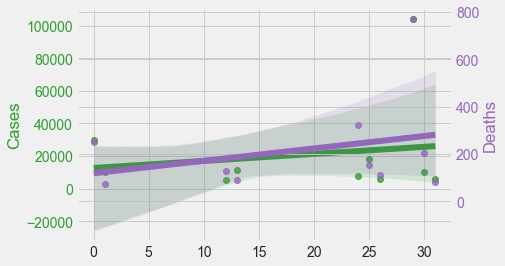

In [39]:
# Using a regression plot to plot dfjc1
x = dfjc1.index
y1 = dfjc1['Cases']
y2 = dfjc1['Deaths']

fig, ax1 = plt.subplots()

# Plot 'Population Density' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Cases', color=color)
sns.regplot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Deaths', color=color)
sns.regplot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


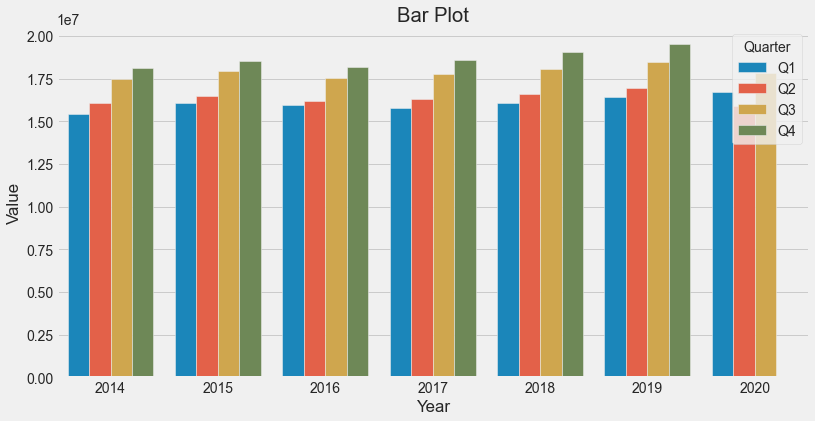

In [40]:
dfu3_melt = pd.melt(dfu3, id_vars='Year', var_name='Quarter', value_name='Value')

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Value', hue='Quarter', data=dfu3_melt)
# barplot = sns.barplot(x='Year', y='Value', hue='Quarter', data=dfu3_melt)


plt.title('Bar Plot')
plt.show()

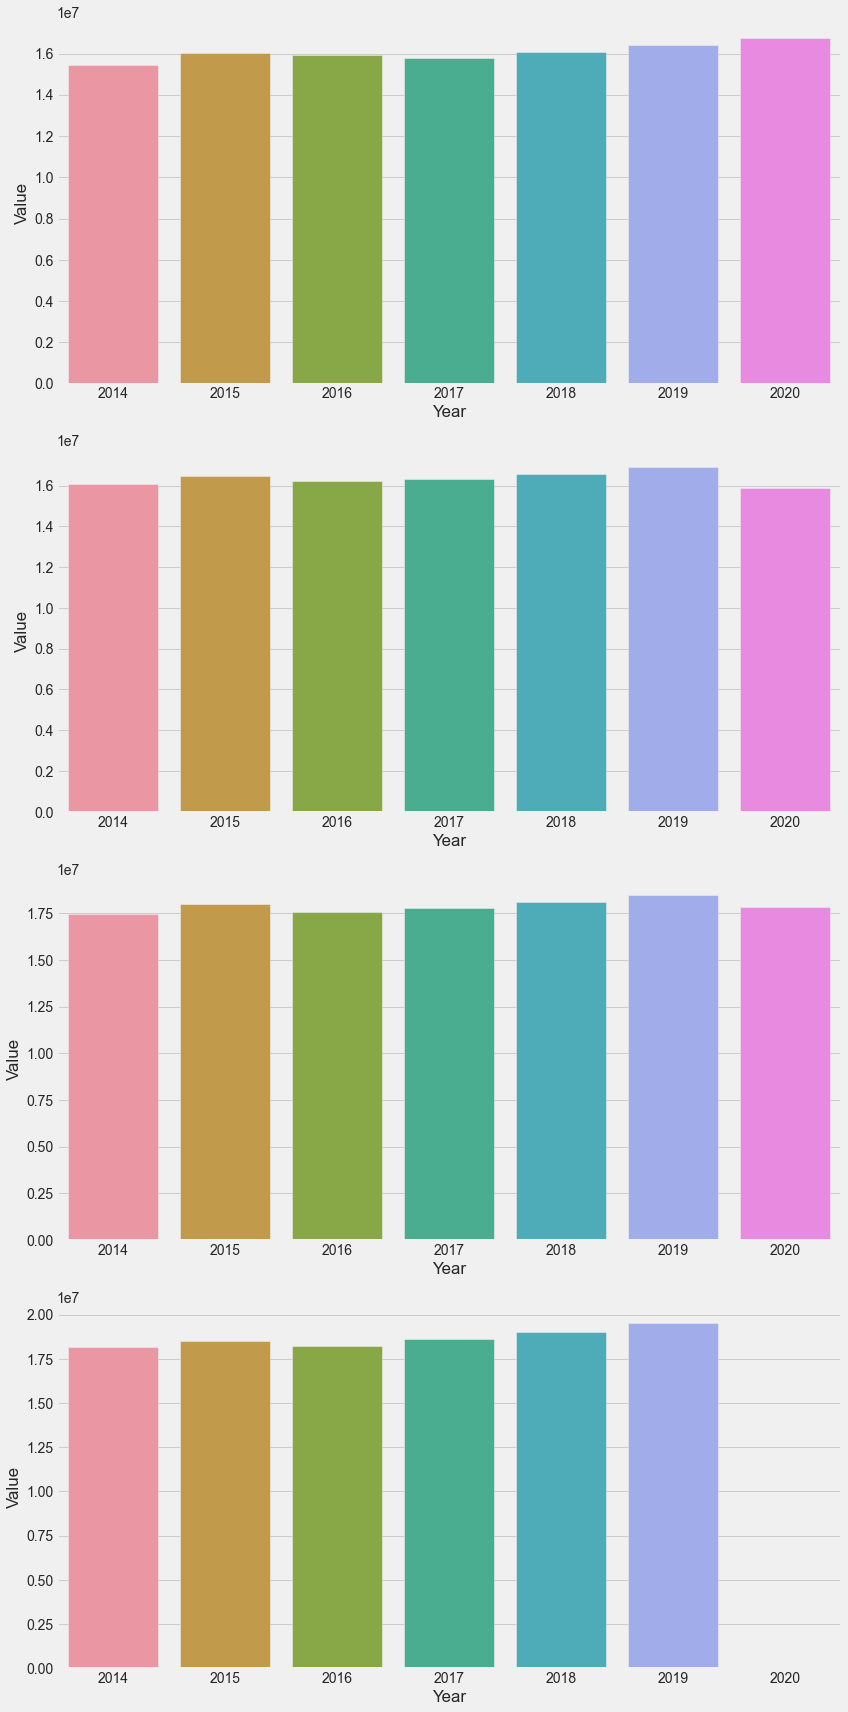

In [41]:
# Reshape the DataFrame with pd.melt()
dfu3_melt = pd.melt(dfu3, id_vars='Year', var_name='Quarter', value_name='Value')

# Create a figure and axes for 4 subplots (one for each quarter)
fig, axs = plt.subplots(4, figsize=(12,24))

# Draw a horizontal line at the value of Q2 in year 2020
q2_2020_value = dfu3.loc[dfu3['Year'] == 2020, 'Q2'].values[0]

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for i, ax in enumerate(axs):
    # Create a bar plot for each quarter
    quarter_data = dfu3_melt[dfu3_melt['Quarter'] == quarters[i]]
    sns.barplot(x='Year', y='Value', data=quarter_data, ax=ax)
    

plt.tight_layout()
plt.show()


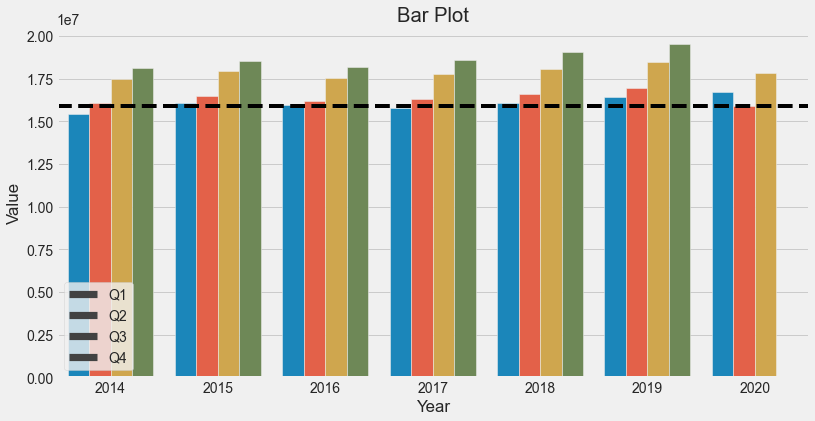

In [42]:
# Reshape the DataFrame with pd.melt()
dfu3_melt = pd.melt(dfu3, id_vars='Year', var_name='Quarter', value_name='Value')

# Create a bar plot
plt.figure(figsize=(12,6))
barplot = sns.barplot(x='Year', y='Value', hue='Quarter', data=dfu3_melt)

# Draw a horizontal line at the value of Q2 in year 2020
q2_2020_value = dfu3.loc[dfu3['Year'] == 2020, 'Q2'].values[0]
plt.axhline(y=q2_2020_value, color='black', linestyle='--')

# Move the legend to lower left and set labels
barplot.legend(loc='lower left', labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.title('Bar Plot')
plt.show()

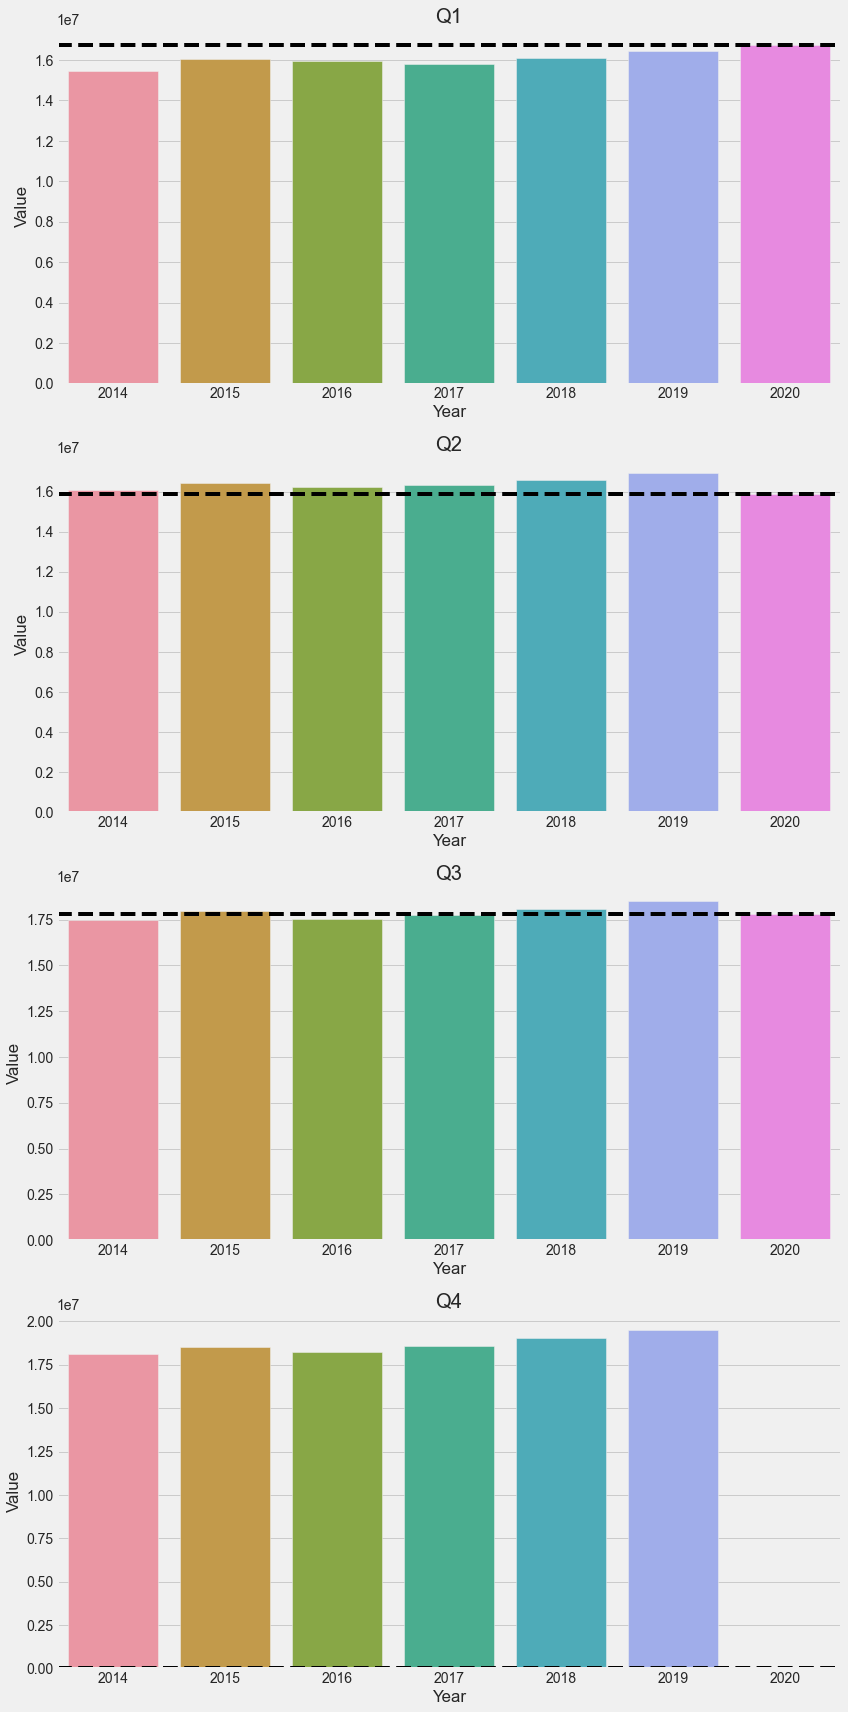

In [43]:
# Reshaping the DataFrame with pd.melt()
dfu3_melt = pd.melt(dfu3, id_vars='Year', var_name='Quarter', value_name='Value')

# Create a figure and axes for 4 subplots (one for each quarter)
fig, axs = plt.subplots(4, figsize=(12,24))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for i, ax in enumerate(axs):
    # Create a bar plot for each quarter
    quarter_data = dfu3_melt[dfu3_melt['Quarter'] == quarters[i]]
    sns.barplot(x='Year', y='Value', data=quarter_data, ax=ax)
    
    # Draw a horizontal line at the value of each quarter in year 2020
    q_2020_value = dfu3.loc[dfu3['Year'] == 2020, quarters[i]].values[0]
    ax.axhline(y=q_2020_value, color='black', linestyle='--')
    
    ax.set_title(quarters[i])

plt.tight_layout()
plt.show()


In [44]:
dfjc1.head()

states         region  Population  Overall CCVI Index  Age  \
29    Lagos     South West    13992000                 0.0  0.1   
0       FCT  North Central     4865000                 0.3  0.0   
25   Rivers    South South     7763000                 0.4  0.5   
13   Kaduna     North West     9227000                 0.7  0.1   
1   Plateau  North Central     4766000                 0.4  0.5   

    Epidemiological  Fragility  Health System  Population Density  \
29              1.0        0.3            0.1                 1.0   
0               0.9        0.4            0.6                 0.9   
25              0.9        0.6            0.6                 0.9   
13              0.9        0.8            0.9                 0.4   
1               0.4        0.8            0.3                 0.3   

    Socio-Economic   Transport Availability  Acute IHR States Affected  \
29             0.1                      0.4       0.93           Lagos   
0              0.6                      0.2       0.79             FCT   
25             0.1                      0.1       1.00          Rivers   
13             0.6                      0.4       0.86          Kaduna   
1              0.5                      0.3       0.93         Plateau   

     Cases  Hospitalized  Discharged  Deaths  
29  104286          1143      102372     771  
0    29535             9       29277     249  
25   18112            -3       17960     155  
13   11675             3       11583      89  
1    10365             4       10286      75